In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Czech Barum'

link = 'https://rally-base.com/2023/barum-czech-rally-zlin-2023/?ssId='
startat, no_ss=7790, int(13) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,10,Wagner Si,RC2,00:07:07.0,80.68 0.00,00:00:00.0 00:00:00.0,1,Czech Barum,1
2,2,18,Kopecký J,RC2,00:07:07.4,80.61 0.04,00:00:00.4 00:00:00.4,1,Czech Barum,2
3,3,5,Lukyanuk,RC2,00:07:08.5,80.40 0.16,00:00:01.5 00:00:01.1,1,Czech Barum,3
4,4,11,Cais Erik,RC2,00:07:09.5,80.21 0.26,00:00:02.5 00:00:01.0,1,Czech Barum,4
5,5,14,Csomós Mi,RC2,00:07:11.0,79.94 0.42,00:00:04.0 00:00:01.5,1,Czech Barum,5
...,...,...,...,...,...,...,...,...,...,...
73,73,116,Chlud Iva,RN6,00:13:21.4,74.97 14.60,00:04:03.7 00:00:13.4,13,Czech Barum,73
74,74,114,Hock Kare,RN10,00:13:35.1,73.71 15.42,00:04:17.4 00:00:13.7,13,Czech Barum,74
75,75,92,Pilka Mar,RN7,00:14:31.8,68.91 18.82,00:05:14.1 00:00:56.7,13,Czech Barum,75
76,76,99,Pavič Pet,RN10,00:15:11.2,65.94 21.18,00:05:53.5 00:00:39.4,13,Czech Barum,76


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                                Pos.                                          \
ss                                 1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                       
1   Paddon  Ha RC2   Czech Barum    9  10   8  11   8   4   5   6  10   -   -   
2   Østberg  M RC2   Czech Barum    8   7   2   4  29  87  87  15  13   9  12   
3   Llarena  E RC2   Czech Barum   12  14  11  10  11   9  11   9   8  11   8   
5   Lukyanuk   RC2   Czech Barum    3   2  10   9   3   4  43   -   -   -   -   
6   Sesks  M.  RC2   Czech Barum   16  18  18  18  14  15  14  14  15  18  15   
7   Franceschi RC2   Czech Barum   13  12  14  14   8  11  10  12  12  10  10   
9   Mareš  Fil RC2   Czech Barum    6   9   7  15   6   3   9   4   6   6   4   
10  Wagner  Si RC2   Czech Barum    1   8   5   7   5   7   8   5  11   5   9   
11  Cais  Erik RC2   Czech Barum    4   6   4   1  10  86   1   1   1   4   2   
12  McErlean   RC2   Czech Barum   17  13  15  13  13  10  12  10   9  12  29   
14  Csomós  Mi RC2   Czech Barum    5   3   1   5   7   4   4   3   3   2   5   
15  Tempestini RC2   Czech Barum   14  16  16  17  15  13  13  13  14  13  11   
16  von Thurn  RC2   Czech Barum   18  19  19  19  17  14  18  16  16  14  13   
17  László  Ma RC2   Czech Barum   19  24  34  96   -   -   -   -   -   -   -   
18  Kopecký  J RC2   Czech Barum    2   4   6   2   2   1   1   8   5   1   1   
19  Ingram  Ch RC2   Czech Barum   15  11   3  12   -   -   -   -   -   -   -   
20  Stříteský  RC2   Czech Barum    6  15  12   8  11   8   7   7   7   3   6   
21  Březík  Ad RC2   Czech Barum   10   5  13   6   4  12   6  11   4   6   7   
22  Vlček  Mar RC2   Czech Barum   21  20  20  21  19  16  16  17  19  16  16   
23  Kołtun  J. RC2   Czech Barum   25  27  24  27  22  17  19  46  32  20   -   
24  Somaschini RC2   Czech Barum   41  44  54  47  36  85  38  43  46  37  42   
25  Cuzma  Bog RC2   Czech Barum   28  43  36  38  26  84  32  40  43  31  35   
45  Cvrček  V. RC2   Czech Barum   23  17  21  20  18  17  15  18  17  17  14   
46  Jirásek  A RC2   Czech Barum   20  21  22  22  16  17  17  19  18  15  17   
47  Jirovec  J RC2   Czech Barum   22  22  29  28  23  17  29  21  21  21  18   
48  Trnovec  P RC2   Czech Barum   26  26  39  35  24  17  30  27  22  22  25   
49  Kurka  Tom RC2   Czech Barum   27  23  31  24  20  17  25  28  27  19  27   
50  Zedník  Pe RC2   Czech Barum   37  29  40  37  30  17  34  32  40  24  33   
51  Vlček  Mar RC2   Czech Barum   29  34  45  50  39  17  37  52  85   -   -   
53  Windisch   RC2   Czech Barum   56  53  52  58   -   -   -   -   -   -   -   
54  László  Z. RC2   Czech Barum   38  35  49  49  38  17  41  39  44  33  43   
55  Titov  Ant RC2   Czech Barum   50  58  58  57  45  17  55  57  47  45  48   

0                                         
ss                                12  13  
No. Crew       Group Race                 
1   Paddon  Ha RC2   Czech Barum   -   -  
2   Østberg  M RC2   Czech Barum  11   9  
3   Llarena  E RC2   Czech Barum   9  12  
5   Lukyanuk   RC2   Czech Barum   -   -  
6   Sesks  M.  RC2   Czech Barum  13  15  
7   Franceschi RC2   Czech Barum   8  10  
9   Mareš  Fil RC2   Czech Barum   5   4  
10  Wagner  Si RC2   Czech Barum  10   2  
11  Cais  Erik RC2   Czech Barum   3   3  
12  McErlean   RC2   Czech Barum  35  41  
14  Csomós  Mi RC2   Czech Barum   4   6  
15  Tempestini RC2   Czech Barum  14  11  
16  von Thurn  RC2   Czech Barum   -   -  
17  László  Ma RC2   Czech Barum   -   -  
18  Kopecký  J RC2   Czech Barum   6   5  
19  Ingram  Ch RC2   Czech Barum   -   -  
20  Stříteský  RC2   Czech Barum   7   7  
21  Březík  Ad RC2   Czech Barum   2   8  
22  Vlček  Mar RC2   Czech Barum  16   -  
23  Kołtun  J. RC2   Czech Barum   -   -  
24  Somaschini RC2   Czech Barum  37  33  
25  Cuzma  Bog RC2   Czech Barum  31  20  
45  Cvrček  V. RC2   Czech Barum  12  14  
46  Jirásek  A RC2   Czech Barum  15  13  
47 

In [8]:
rally2023_ClassView

0                                Pos.                                       \
ss                                 1    2   3   4   5   6   7   8   9   10   
No. Crew       Group Race                                                    
1   Paddon  Ha RC2   Czech Barum    9   10   8  11   8   4   5   6  10   -   
2   Østberg  M RC2   Czech Barum    8    7   2   4  29  87  87  15  13   9   
3   Llarena  E RC2   Czech Barum   12   14  11  10  11   9  11   9   8  11   
5   Lukyanuk   RC2   Czech Barum    3    2  10   9   3   4  43   -   -   -   
6   Sesks  M.  RC2   Czech Barum   16   18  18  18  14  15  14  14  15  18   
...                               ...  ...  ..  ..  ..  ..  ..  ..  ..  ..   
115 Gajdošík   RN10  Czech Barum   89   90  77  77  77  17  70  78  69  67   
116 Chlud  Iva RN6   Czech Barum  100   95  93  93  86  17  83  87  83  80   
117 Valla  Rud RN6   Czech Barum  101   99  94  92  87  17  82  91   -   -   
118 Liška  Mil RN10  Czech Barum  102  102  97  95  90  17  85  92  86   -   
119 Kowalczyk  RC4 I Czech Barum   44   77  61  80  48  17  44  38  42  44   

0                                             
ss                                11  12  13  
No. Crew       Group Race                     
1   Paddon  Ha RC2   Czech Barum   -   -   -  
2   Østberg  M RC2   Czech Barum  12  11   9  
3   Llarena  E RC2   Czech Barum   8   9  12  
5   Lukyanuk   RC2   Czech Barum   -   -   -  
6   Sesks  M.  RC2   Czech Barum  15  13  15  
...                               ..  ..  ..  
115 Gajdošík   RN10  Czech Barum  66  61  61  
116 Chlud  Iva RN6   Czech Barum  77  74  73  
117 Valla  Rud RN6   Czech Barum   -   -   -  
118 Liška  Mil RN10  Czech Barum   -   -   -  
119 Kowalczyk  RC4 I Czech Barum  36  34  32  

[105 rows x 13 columns]

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,10,Wagner Si,RC2,1,Czech Barum,1,427.0
2,18,Kopecký J,RC2,1,Czech Barum,2,427.4
3,5,Lukyanuk,RC2,1,Czech Barum,3,428.5
4,11,Cais Erik,RC2,1,Czech Barum,4,429.5
5,14,Csomós Mi,RC2,1,Czech Barum,5,431.0
...,...,...,...,...,...,...,...
73,116,Chlud Iva,RN6,13,Czech Barum,73,801.4
74,114,Hock Kare,RN10,13,Czech Barum,74,815.1
75,92,Pilka Mar,RN7,13,Czech Barum,75,871.8
76,99,Pavič Pet,RN10,13,Czech Barum,76,911.2


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race        ss          
Czech Barum 1      427.0
            2      457.0
            3      379.0
            4      830.9
            5      450.7
            6      377.8
            7      822.0
            8      381.6
            9      575.6
            10     562.6
            11     375.4
            12     565.1
            13     557.7

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0
...,...,...,...,...,...,...,...,...
1209,116,Chlud Iva,RN6,13,Czech Barum,73,801.4,557.7
1210,114,Hock Kare,RN10,13,Czech Barum,74,815.1,557.7
1211,92,Pilka Mar,RN7,13,Czech Barum,75,871.8,557.7
1212,99,Pavič Pet,RN10,13,Czech Barum,76,911.2,557.7


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0,0.0,0.000000,01
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0,0.4,0.093677,01
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0,1.5,0.351288,01
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0,2.5,0.585480,01
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0,4.0,0.936768,01
...,...,...,...,...,...,...,...,...,...,...,...
1209,116,Chlud Iva,RN6,13,Czech Barum,73,801.4,557.7,243.7,43.697328,13
1210,114,Hock Kare,RN10,13,Czech Barum,74,815.1,557.7,257.4,46.153846,13
1211,92,Pilka Mar,RN7,13,Czech Barum,75,871.8,557.7,314.1,56.320602,13
1212,99,Pavič Pet,RN10,13,Czech Barum,76,911.2,557.7,353.5,63.385333,13


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0,0.0,0.000000,01
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0,0.4,0.093677,01
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0,1.5,0.351288,01
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0,2.5,0.585480,01
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0,4.0,0.936768,01
...,...,...,...,...,...,...,...,...,...,...,...
1156,25,Cuzma Bog,RC2,13,Czech Barum,20,609.6,557.7,51.9,9.306079,13
1169,24,Somaschini,RC2,13,Czech Barum,33,631.0,557.7,73.3,13.143267,13
1172,54,László Z.,RC2,13,Czech Barum,36,636.5,557.7,78.8,14.129460,13
1174,55,Titov Ant,RC2,13,Czech Barum,38,644.4,557.7,86.7,15.545992,13


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0,0.0,0.000000,01
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0,0.4,0.093677,01
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0,1.5,0.351288,01
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0,2.5,0.585480,01
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0,4.0,0.936768,01
...,...,...,...,...,...,...,...,...,...,...,...
1156,25,Cuzma Bog,RC2,13,Czech Barum,20,609.6,557.7,51.9,9.306079,13
1169,24,Somaschini,RC2,13,Czech Barum,33,631.0,557.7,73.3,13.143267,13
1172,54,László Z.,RC2,13,Czech Barum,36,636.5,557.7,78.8,14.129460,13
1174,55,Titov Ant,RC2,13,Czech Barum,38,644.4,557.7,86.7,15.545992,13


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Czech Barum                                                   \
SS.                 01     02     03     04     05      06     07    08   
Crew                                                                      
Březík  Ad         6.2   4.70   9.10   13.2   4.30    8.30   10.1  10.1   
Cais  Erik         2.5   5.00   2.60    0.0   8.90   81.10    0.0   0.0   
Csomós  Mi         4.0   4.40   0.00    9.4   7.20    1.80    2.8   1.8   
Cuzma  Bog        39.2  55.30  48.00  116.4  40.20   41.70  101.4  68.5   
Cvrček  V.        26.1  15.30  24.60   47.1  18.90   24.20   47.2  28.6   
Franceschi         8.9  10.40  10.30   22.2   8.20    7.60   12.5  12.6   
Ingram  Ch         9.7   9.40   2.30   18.8    NaN     NaN    NaN   NaN   
Jirovec  J        26.0  25.10  37.20   84.5  31.70   24.20   94.6  32.5   
Jirásek  A        20.8  22.00  25.20   58.4  15.70   24.20   55.8  29.1   
Kopecký  J         0.4   4.50   3.70    3.3   2.80    0.00    0.0   5.0   
Kołtun  J.        31.0  35.10  30.80   84.3  26.30   24.20   70.2  73.1   
Kurka  Tom        38.4  25.80  37.90   77.9  22.60   24.20   84.6  42.3   
Llarena  E         8.7  11.20   8.60   17.4  10.10    5.50   12.9   5.2   
Lukyanuk           1.5   2.70   6.50   15.4   3.60    1.80  151.3   NaN   
László  Ma        17.4  27.50  40.70  600.0    NaN     NaN    NaN   NaN   
László  Z.        49.0  47.30  63.80  141.0  50.20   24.20  147.8  67.0   
Mareš  Fil         4.6   8.40   4.70   23.4   6.90    1.30   12.3   3.9   
McErlean          15.8  10.80  11.50   20.2  11.20    7.50   17.8   8.8   
Paddon  Ha         5.9   9.10   4.90   18.7   8.20    1.80    8.9   4.5   
Sesks  M.         13.0  17.00  13.40   32.7  13.40   14.70   22.8  13.9   
Somaschini        51.5  55.80  73.80  138.2  48.40   65.10  136.1  69.4   
Stříteský          4.6  12.20   8.80   13.9  10.10    3.20   11.3   4.9   
Tempestini         9.3  15.00  11.80   32.0  14.70    8.90   21.0  12.8   
Titov  Ant        64.9  70.90  77.80  170.7  62.90   24.20  194.6  91.4   
Trnovec  P        37.5  33.70  48.80  105.6  32.70   24.20   97.4  40.4   
Vlček  Mar        32.6  33.95  41.05  100.0  35.05   24.15   94.7  51.2   
Wagner  Si         0.0   6.40   2.70   13.3   6.60    2.30   12.1   4.4   
Windisch          68.0  68.50  67.80  171.6    NaN     NaN    NaN   NaN   
Zedník  Pe        48.4  40.00  53.20  111.9  43.30   24.20  116.1  50.4   
von Thurn         16.1  18.10  15.20   40.7  17.00   14.10   65.4  19.9   
Østberg  M         5.3   5.40   2.20    6.6  42.60  600.00  600.0  19.2   

Race                                         
SS.             09    10    11     12    13  
Crew                                         
Březík  Ad    5.80   3.5   4.5    3.1   4.3  
Cais  Erik    0.00   2.5   0.2    3.7   0.7  
Csomós  Mi    5.30   1.1   3.6    6.7   2.3  
Cuzma  Bog  108.20  64.1  61.4   99.8  51.9  
Cvrček  V.   34.50  29.9  19.1   26.2  28.6  
Franceschi   13.90   6.4  11.4   13.2   7.2  
Ingram  Ch     NaN   NaN   NaN    NaN   NaN  
Jirovec  J   55.60  43.1  34.0   50.7  35.3  
Jirásek  A   36.40  19.1  23.0   37.4  25.8  
Kopecký  J    7.00   0.0   0.0    7.8   1.6  
Kołtun  J.   77.80  40.4   NaN    NaN   NaN  
Kurka  Tom   64.20  35.3  43.3   55.6  35.3  
Llarena  E   10.30   8.8   5.1   13.8  12.1  
Lukyanuk       NaN   NaN   NaN    NaN   NaN  
László  Ma     NaN   NaN   NaN    NaN   NaN  
László  Z.  110.90  72.9  82.3  123.6  78.8  
Mareš  Fil    8.00   3.5   2.8    6.8   1.4  
McErlean     10.90  15.3  45.6  101.6  94.2  
Paddon  Ha   11.00   NaN   NaN    NaN   NaN  
Sesks  M.    22.60  31.3  19.8   26.5  30.7  
Somaschini  117.90  76.1  77.6  112.5  73.3  
Stříteský     9.20   1.3   4.2    9.0   3.8  
Tempestini   22.50  16.9  15.5   28.0  11.6  
Titov  Ant  120.40  85.7  84.7  122.7  86.7  
Trnovec  P   56.90  47.1  40.6   71.2  47.1  
Vlček  Mar  161.25  20.6  21.3   38.9   NaN  
Wagner  Si   12.30   2.6   6.1   15.2   0.3  
Windisch       NaN   NaN   NaN    NaN   NaN  
Zedník  Pe  103.00  52.

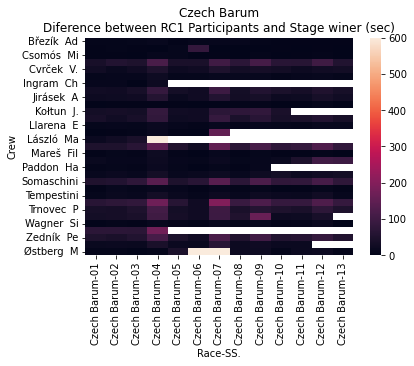

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

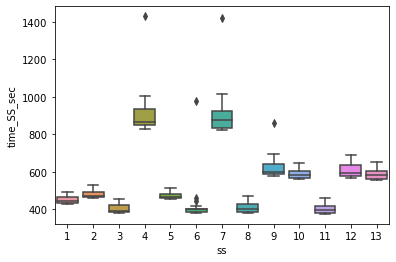

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

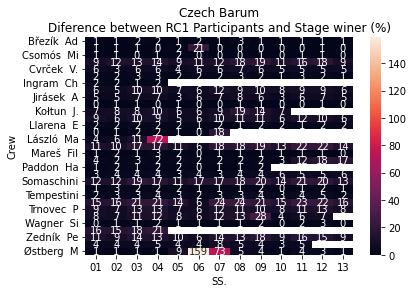

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")